In [4]:
import numpy as np
import pandas as pd

#!pip3 install xgboost as xgboost
import xgboost


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt

In [5]:
#1.Read the depression dataset

In [200]:
path='depressiondataset3Copy.csv'
dataset = pd.read_csv(path)
dataset

,Weight loss/lack of appetite,Social/Anti-social,Vitamin deficiency,Productivity level,Performance in academic life,Probability of Depression,Depress,Class of Depression
0,1,1,1,0.0,0.0,1.0,1,severe
1,1,1,0,0.1,1.0,0.9,1,severe
2,1,1,1,0.0,0.0,1.0,1,severe
3,1,1,0,0.2,1.0,0.4,1,mild
4,1,1,0,0.0,0.0,0.9,1,severe
...,...,...,...,...,...,...,...,...
584,1,0,1,0.3,0.2,0.3,1,NaN
585,0,1,0,0.4,0.1,0.2,1,NaN
586,1,1,0,0.5,0.4,0.0,0,NaN
587,0,1,1,0.3,0.2,0.7,1,NaN


In [201]:
dataset.head()

,Weight loss/lack of appetite,Social/Anti-social,Vitamin deficiency,Productivity level,Performance in academic life,Probability of Depression,Depress,Class of Depression
0,1,1,1,0.0,0.0,1.0,1,severe
1,1,1,0,0.1,1.0,0.9,1,severe
2,1,1,1,0.0,0.0,1.0,1,severe
3,1,1,0,0.2,1.0,0.4,1,mild
4,1,1,0,0.0,0.0,0.9,1,severe


In [202]:
#To select the depressed column 

dataset.Depressed

AttributeError: 'DataFrame' object has no attribute 'Depressed'

In [203]:
yesdepressed=dataset.loc[dataset.Depressed == 'Y']

AttributeError: 'DataFrame' object has no attribute 'Depressed'

In [204]:
yesdepressed

NameError: name 'yesdepressed' is not defined

In [205]:
yesdepressed.Depressed

NameError: name 'yesdepressed' is not defined

In [206]:
#2.Divide dataset into training & validation dataset
#random selection on dataset: 20% under validation, 80% under training 

In [207]:
var_colums = [c for c in dataset.columns if c not in ['Depress','Class of Depression']]
X = dataset.loc[:, var_colums]
y = dataset.loc[:, 'Depress']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((471, 6), (118, 6), (471,), (118,))

In [208]:
#3.Create xgboost model

In [209]:
xgboost.XGBClassifier().get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [210]:
#set some of the hyperparameter values

In [211]:
model_xgboost = xgboost.XGBClassifier(learning_rate=0.1,
                                      max_depth=5,
                                      n_estimators=100,
                                      subsample=0.5,
                                      colsample_bytree=0.5,
                                      eval_metric='auc',
                                      verbosity=1)

#evaluate the dataset while model is being trained
eval_set = [(X_valid, y_valid)]

model_xgboost.fit(X_train,
                  y_train,
                  early_stopping_rounds=10,
                  eval_set=eval_set,
                  verbose=True)
                

[0]	validation_0-auc:0.76541
[1]	validation_0-auc:0.77405
[2]	validation_0-auc:0.76355
[3]	validation_0-auc:0.76118
[4]	validation_0-auc:0.76440
[5]	validation_0-auc:0.76812
[6]	validation_0-auc:0.77727
[7]	validation_0-auc:0.77896
[8]	validation_0-auc:0.77625
[9]	validation_0-auc:0.76778
[10]	validation_0-auc:0.78100
[11]	validation_0-auc:0.78100
[12]	validation_0-auc:0.77846
[13]	validation_0-auc:0.77846
[14]	validation_0-auc:0.77642
[15]	validation_0-auc:0.78049
[16]	validation_0-auc:0.77744
[17]	validation_0-auc:0.78218
[18]	validation_0-auc:0.78083
[19]	validation_0-auc:0.78557
[20]	validation_0-auc:0.78625
[21]	validation_0-auc:0.78523
[22]	validation_0-auc:0.78184
[23]	validation_0-auc:0.78591
[24]	validation_0-auc:0.78015
[25]	validation_0-auc:0.77304
[26]	validation_0-auc:0.77270
[27]	validation_0-auc:0.77236
[28]	validation_0-auc:0.77541
[29]	validation_0-auc:0.76897


C:\Program Files\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [212]:
#total no of trees=10

In [213]:
#4. Evaluate model performance using AUC confusion matrix based on first iteration on the model.

In [214]:
y_train_pred = model_xgboost.predict_proba(X_train)[:,1]
y_valid_pred = model_xgboost.predict_proba(X_valid)[:,1]

print("AUC for Training dataset: {:.4f}\nAUC for Validation dataset: {:.4f}".format(roc_auc_score(y_train, y_train_pred),
                                                    roc_auc_score(y_valid, y_valid_pred)))

AUC for Training dataset: 0.8199
AUC for Validation dataset: 0.7862


In [215]:
#5.Hyperparameter Tuning- to get the best parameters by using cross validation technique

In [216]:
#initialise some hyperparameters 
learning_rate_list = [0.02, 0.05, 0.1]
max_depth_list = [2, 3, 5]
n_estimators_list = [1000, 2000, 300]

params_dict = {"learning_rate": learning_rate_list,
               "max_depth": max_depth_list,
               "n_estimators": n_estimators_list}

num_combinations = 1
for v in params_dict.values(): num_combinations *= len(v) 

print("Total combination of hyperparameters tried : ", num_combinations)
params_dict

Total combination of hyperparameters tried :  27


{'learning_rate': [0.02, 0.05, 0.1],
 'max_depth': [2, 3, 5],
 'n_estimators': [1000, 2000, 300]}

In [217]:
#6.GridSearchCV is passed.A custom scoring function based on sklearn's roc_auc_score() which calculates area under the curve is used.
#CV value=2, meaning dataset is split into 2 parts for cross validation, and it will undergo 2 iteration
#each iteration is done on the training as well as validation dataset

In [218]:
def my_roc_auc_score(model, X, y): return roc_auc_score(y, model.predict_proba(X)[:,1])

model_xgboost_hp = GridSearchCV(estimator=xgboost.XGBClassifier(subsample=0.5,
                                                                colsample_bytree=0.25,
                                                                eval_metric='auc',
                                                                use_label_encoder=False),
                                param_grid=params_dict,
                                cv=2,
                                scoring=my_roc_auc_score,
                                return_train_score=True,
                                verbose=4)

model_xgboost_hp.fit(X, y)

Fitting 2 folds for each of 27 candidates, totalling 54 fits
[CV 1/2] END learning_rate=0.02, max_depth=2, n_estimators=1000;, score=(train=0.873, test=0.697) total time=   0.8s
[CV 2/2] END learning_rate=0.02, max_depth=2, n_estimators=1000;, score=(train=0.759, test=0.840) total time=   0.7s
[CV 1/2] END learning_rate=0.02, max_depth=2, n_estimators=2000;, score=(train=0.888, test=0.707) total time=   1.5s
[CV 2/2] END learning_rate=0.02, max_depth=2, n_estimators=2000;, score=(train=0.765, test=0.842) total time=   1.5s
[CV 1/2] END learning_rate=0.02, max_depth=2, n_estimators=300;, score=(train=0.852, test=0.688) total time=   0.2s
[CV 2/2] END learning_rate=0.02, max_depth=2, n_estimators=300;, score=(train=0.732, test=0.837) total time=   0.2s
[CV 1/2] END learning_rate=0.02, max_depth=3, n_estimators=1000;, score=(train=0.875, test=0.696) total time=   0.8s
[CV 2/2] END learning_rate=0.02, max_depth=3, n_estimators=1000;, score=(train=0.763, test=0.839) total time=   0.7s
[CV 1

GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.25,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', gamma=None, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_c...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'learning_rate': [0.02, 0.05, 0.1],
                         'max_depth': [2, 3, 5],
                         'n_estimators': [1000, 2000, 300]},
             return_train_score=True,
             scoring=<function my_roc_auc_score at 0x0000020927458A60>,
             verbose=4)

In [219]:
#7.Check the results of hyperparameter tuning

In [220]:
#add more dataset
df_cv_results = pd.DataFrame(model_xgboost_hp.cv_results_)
df_cv_results = df_cv_results[['rank_test_score','mean_test_score','mean_train_score',
                               'param_learning_rate', 'param_max_depth', 'param_n_estimators']]
df_cv_results.sort_values(by='rank_test_score', inplace=True)
df_cv_results

,rank_test_score,mean_test_score,mean_train_score,param_learning_rate,param_max_depth,param_n_estimators
13,1,0.776920,0.834868,0.05,3,2000
16,2,0.776384,0.834925,0.05,5,2000
22,3,0.775878,0.835065,0.1,3,2000
10,4,0.774929,0.833208,0.05,2,2000
25,5,0.774583,0.836164,0.1,5,2000
1,6,0.774091,0.826021,0.02,2,2000
19,7,0.773991,0.835034,0.1,2,2000
4,8,0.772656,0.828406,0.02,3,2000
7,9,0.772009,0.829443,0.02,5,2000
9,10,0.771786,0.827788,0.05,2,1000


C:\Users\moham\AppData\Roaming\Python\Python39\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
C:\Users\moham\AppData\Roaming\Python\Python39\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
C:\Users\moham\AppData\Roaming\Python\Python39\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


Text(0.5, 1.0, 'Performance wrt # of Trees and Depth')

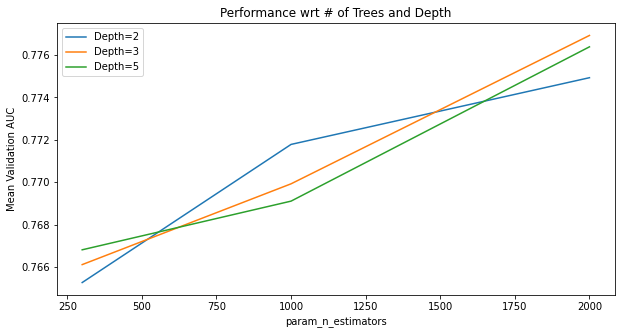

In [222]:
# First sort by number of estimators as that would be x-axis
df_cv_results.sort_values(by='param_n_estimators', inplace=True)

# Find values of AUC for learning rate of 0.05 and different values of depth
lr_d2 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.05) & (df_cv_results['param_max_depth']==2),:]
lr_d3 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.05) & (df_cv_results['param_max_depth']==3),:]
lr_d5 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.05) & (df_cv_results['param_max_depth']==5),:]
lr_d7 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.05) & (df_cv_results['param_max_depth']==7),:]

# Let us plot now
fig, ax = plt.subplots(figsize=(10,5))
lr_d2.plot(x='param_n_estimators', y='mean_test_score', label='Depth=2', ax=ax)
lr_d3.plot(x='param_n_estimators', y='mean_test_score', label='Depth=3', ax=ax)
lr_d5.plot(x='param_n_estimators', y='mean_test_score', label='Depth=5', ax=ax)

plt.ylabel('Mean Validation AUC')
plt.title('Performance wrt # of Trees and Depth')

# Final model

In [313]:
model_xgboost_fin = xgboost.XGBClassifier(learning_rate=0.05,
                                          max_depth=2,
                                          n_estimators=5000,
                                          subsample=0.5,
                                          colsample_bytree=0.25,
                                          eval_metric='auc',
                                          verbosity=1,
                                          use_label_encoder=False)

# Passing both training and validation dataset as we want to plot AUC for both
eval_set = [(X_train, y_train),(X_valid, y_valid)]

model_xgboost_fin.fit(X_train,
                  y_train,
                  early_stopping_rounds=20,
                  eval_set=eval_set,
                  verbose=True)

[0]	validation_0-auc:0.89062	validation_1-auc:0.85714
[1]	validation_0-auc:0.89062	validation_1-auc:0.85714
[2]	validation_0-auc:0.90625	validation_1-auc:0.92857
[3]	validation_0-auc:0.90625	validation_1-auc:0.92857
[4]	validation_0-auc:0.89509	validation_1-auc:0.88095
[5]	validation_0-auc:0.88170	validation_1-auc:1.00000
[6]	validation_0-auc:0.89732	validation_1-auc:0.80952
[7]	validation_0-auc:0.87946	validation_1-auc:0.80952
[8]	validation_0-auc:0.87946	validation_1-auc:0.80952
[9]	validation_0-auc:0.89732	validation_1-auc:0.80952
[10]	validation_0-auc:0.92411	validation_1-auc:0.71429
[11]	validation_0-auc:0.91071	validation_1-auc:0.80952
[12]	validation_0-auc:0.91071	validation_1-auc:0.80952
[13]	validation_0-auc:0.91071	validation_1-auc:0.80952
[14]	validation_0-auc:0.90179	validation_1-auc:0.80952
[15]	validation_0-auc:0.90179	validation_1-auc:0.80952
[16]	validation_0-auc:0.92634	validation_1-auc:0.76190
[17]	validation_0-auc:0.92634	validation_1-auc:0.76190
[18]	validation_0-au

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.25,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=5000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [338]:
y_train_pred = model_xgboost_fin.predict_proba(X_train)[:,1]
y_valid_pred = model_xgboost_fin.predict_proba(X_valid)[:,1]

print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred),
                                                    roc_auc_score(y_valid, y_valid_pred)))

AUC Train: 0.9135
AUC Valid: 0.8600


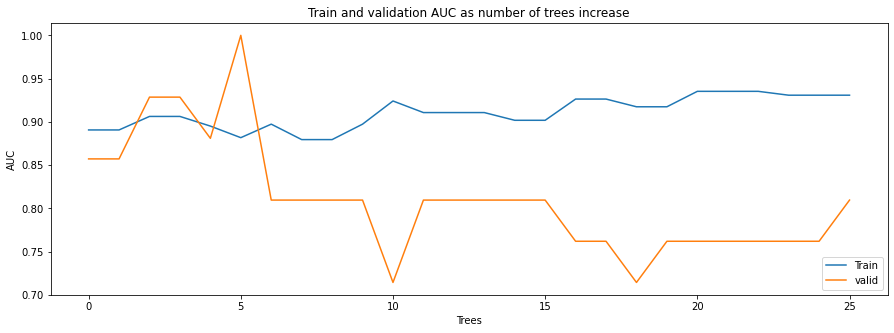

In [339]:
evaluation_results = model_xgboost_fin.evals_result()

# Index into each key to find AUC values for training and validation data after each tree
train_auc_tree = evaluation_results['validation_0']['auc']
valid_auc_tree = evaluation_results['validation_1']['auc']


# Plotting Section
plt.figure(figsize=(15,5))

plt.plot(train_auc_tree, label='Train')
plt.plot(valid_auc_tree, label='valid')

plt.title("Train and validation AUC as number of trees increase")
plt.xlabel("Trees")
plt.ylabel("AUC")
plt.legend(loc='lower right')
plt.show()

In [341]:
df_var_imp = pd.DataFrame({"Variable": var_colums,
                           "Importance": model_xgboost_fin.feature_importances_}) \
                        .sort_values(by='Importance', ascending=False)
df_var_imp[:10]

,Variable,Importance
5,Probability of Depression,0.390092
0,Weight loss/lack of appetite,0.212358
4,Performance in academic life,0.105773
3,Productivity level,0.103965
2,Vitamin deficiency,0.095257
1,Social/Anti-social,0.092556
